# Import Library

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.naive_bayes  import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
mcred=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data file.csv')

In [9]:
mcred.head(10).T

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,1,2,3,4,5,6,7,8,9,10
label,0,1,1,1,1,1,1,1,1,1
msisdn,21408I70789,76462I70374,17943I70372,55773I70781,03813I82730,35819I70783,96759I84459,09832I90846,59772I84450,56331I70783
aon,272,712,535,241,947,568,545,768,1191,536
daily_decr30,3055.05,12122,1398,21.228,150.619,2257.36,2876.64,12905,90.695,29.3573
daily_decr90,3065.15,12124.8,1398,21.228,150.619,2261.46,2883.97,17804.2,90.695,29.3573
rental30,220.13,3691.26,900.13,159.42,1098.9,368.13,335.75,900.35,2287.5,612.96
rental90,260.13,3691.26,900.13,159.42,1098.9,380.13,402.9,2549.11,2287.5,612.96
last_rech_date_ma,2,20,3,41,4,2,13,4,1,11
last_rech_date_da,0,0,0,0,0,0,0,55,0,0


## EDA

In [10]:
mcred.keys()

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [11]:
mcred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [12]:
#droping not necessary columns and columns with Homogineus Data
mcred.drop(['Unnamed: 0' ,'msisdn'] , inplace=True , axis=1)

In [13]:
mcred.shape

(209593, 35)

In [14]:
mcred.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


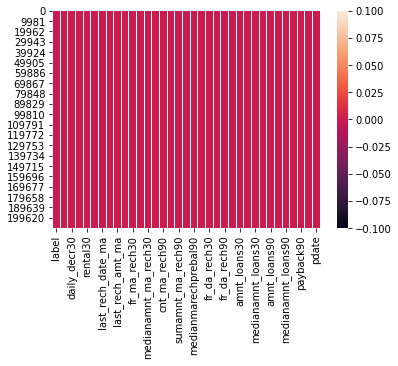

In [15]:
sns.heatmap(mcred.isnull())

In [16]:
mcred.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

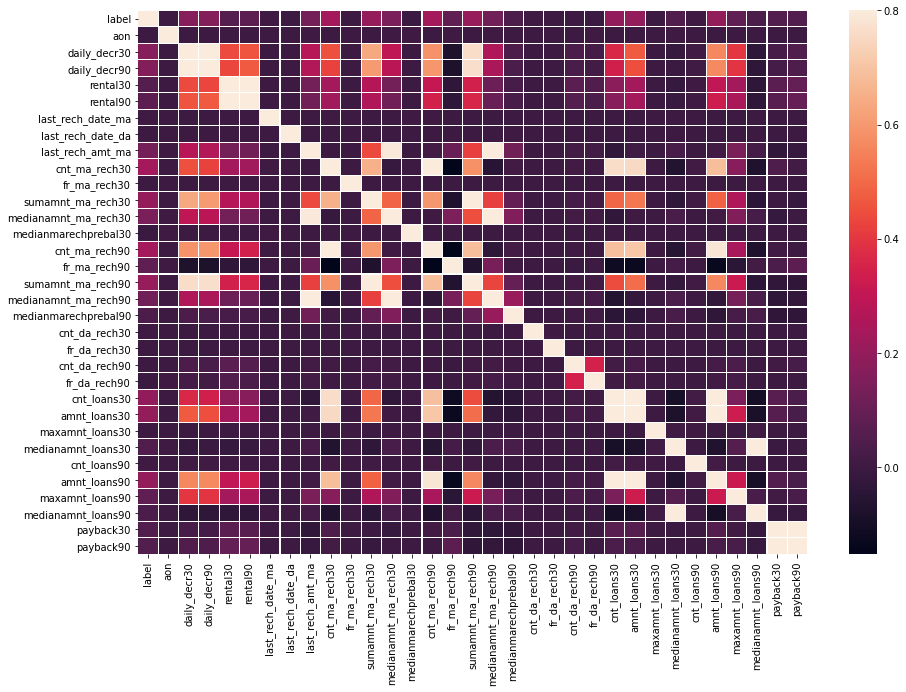

In [17]:
#plotting heat map of the corelation matrix 
plt.figure(figsize=(15,10))
sns.heatmap(mcred.corr(),linewidth=0.1,vmax=0.8,annot=False,cbar=hex)
plt.show()

In [18]:
mcred['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [19]:
mcred['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [20]:
#seperating into date and time column
mcred['pdate'] = pd.to_datetime(mcred['pdate'])
mcred['Day'] = mcred['pdate'].dt.day
mcred['Month'] = mcred['pdate'].dt.month
mcred['Year'] = mcred['pdate'].dt.year

In [21]:
mcred.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,Day,Month,Year
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20,20,7,2016
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10,10,8,2016
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19,19,8,2016
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06,6,6,2016
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22,22,6,2016


In [22]:
mcred.drop(['pdate'],inplace=True, axis=1)

In [23]:
mcred.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Day,Month,Year
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20,7,2016
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10,8,2016
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19,8,2016
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6,6,2016
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22,6,2016


## Visualization

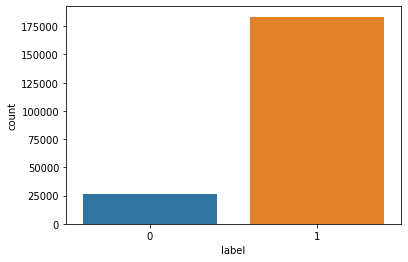

In [24]:
sns.countplot(mcred.label)
plt.show()

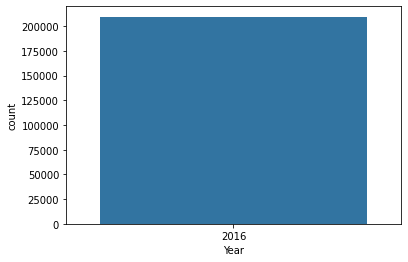

In [25]:
sns.countplot(mcred.Year)
plt.show()

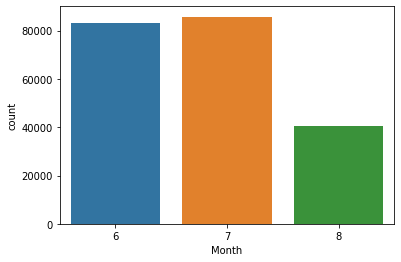

In [26]:
sns.countplot(mcred.Month)
plt.show()

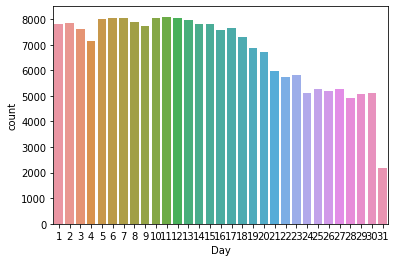

In [27]:
sns.countplot(mcred.Day)
plt.show()

In [28]:
loanpayed=mcred[mcred['label']==1]
loanpayed

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Day,Month,Year
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10,8,2016
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19,8,2016
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6,6,2016
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22,6,2016
5,1,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,1539,4,10.0,6156.0,1539.0,15.40,8,0,11744,1539.0,55.90,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2,7,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17,6,2016
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12,6,2016
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29,7,2016
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,25,7,2016


In [29]:
loanpayed.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pcircle', 'Day', 'Month', 'Year'],
      dtype='object')

In [30]:
dt=loanpayed.iloc[:,:-4]

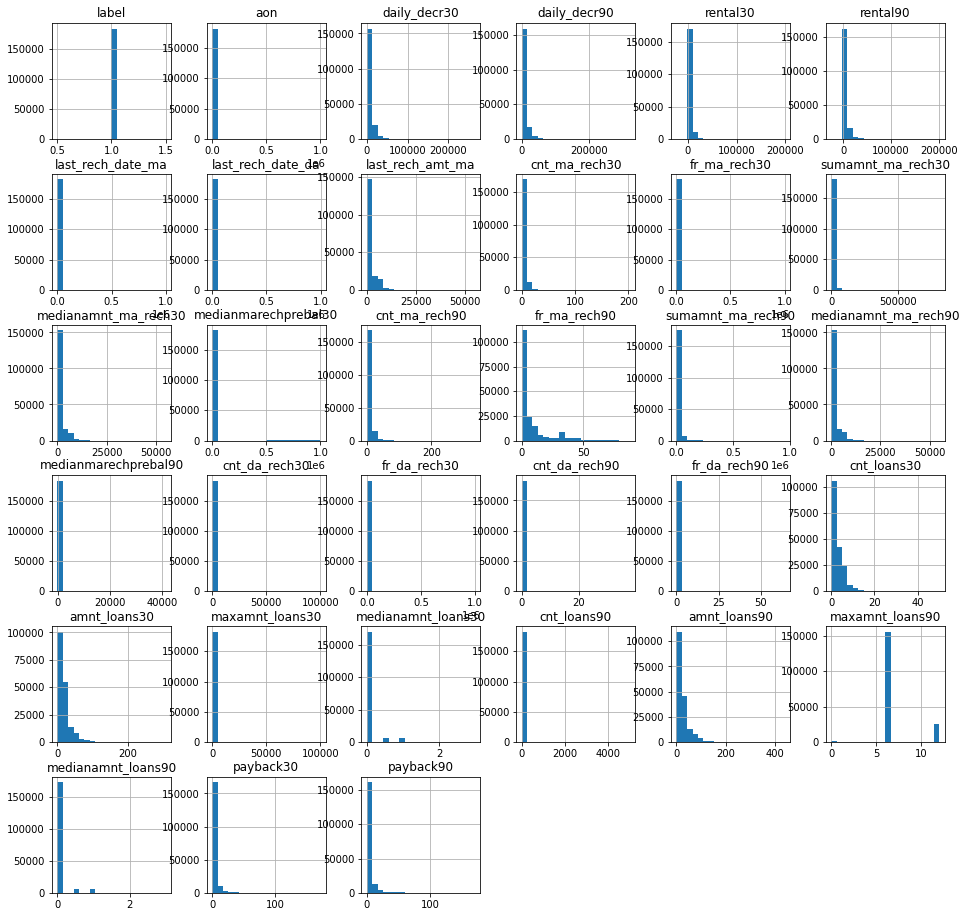

In [31]:
dt[['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']].hist(bins=20,
                                                                               figsize=(16, 16))
plt.show()

In [32]:
defaulter=mcred[mcred['label']==0]
defaulter

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Day,Month,Year
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,20,7,2016
11,0,82.0,65.166667,65.166667,326.20,326.20,17.0,0.0,7526,2,0.0,9065.0,4532.5,489.00,2,0,9065,4532.5,489.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,20,6,2016
15,0,1037.0,12.000000,12.000000,1216.80,1216.80,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,24,6,2016
16,0,1583.0,1000.000000,1000.000000,1000.80,1087.88,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,4,7,2016
21,0,378.0,514.693333,515.200000,56.26,58.20,2.0,0.0,773,1,0.0,773.0,773.0,542.00,2,64,1546,773.0,283.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.0,0.0,UPW,1,7,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209547,0,153.0,5670.733333,5672.200000,1817.08,2764.88,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,20,7,2016
209549,0,843.0,729.235000,758.470000,7470.90,9537.90,1.0,0.0,770,1,0.0,770.0,770.0,19.82,2,40,6557,3278.5,49.82,0.0,0.0,0,0,1,6,6.0,0.0,2.0,12,6,0.0,0.0,25.5,UPW,15,7,2016
209554,0,744.0,1454.491667,1461.750000,559.73,655.28,31.0,0.0,2309,0,0.0,0.0,0.0,0.00,1,0,2309,2309.0,20.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,13,7,2016
209571,0,827.0,1867.668667,1881.180000,1875.72,2312.65,14.0,0.0,1924,2,3.0,3848.0,1924.0,6.20,2,3,3848,1924.0,6.20,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,13,7,2016


In [33]:
dt2=defaulter.iloc[:,:-4]
dt2

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0
11,0,82.0,65.166667,65.166667,326.20,326.20,17.0,0.0,7526,2,0.0,9065.0,4532.5,489.00,2,0,9065,4532.5,489.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0
15,0,1037.0,12.000000,12.000000,1216.80,1216.80,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0
16,0,1583.0,1000.000000,1000.000000,1000.80,1087.88,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0
21,0,378.0,514.693333,515.200000,56.26,58.20,2.0,0.0,773,1,0.0,773.0,773.0,542.00,2,64,1546,773.0,283.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209547,0,153.0,5670.733333,5672.200000,1817.08,2764.88,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0
209549,0,843.0,729.235000,758.470000,7470.90,9537.90,1.0,0.0,770,1,0.0,770.0,770.0,19.82,2,40,6557,3278.5,49.82,0.0,0.0,0,0,1,6,6.0,0.0,2.0,12,6,0.0,0.0,25.5
209554,0,744.0,1454.491667,1461.750000,559.73,655.28,31.0,0.0,2309,0,0.0,0.0,0.0,0.00,1,0,2309,2309.0,20.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0
209571,0,827.0,1867.668667,1881.180000,1875.72,2312.65,14.0,0.0,1924,2,3.0,3848.0,1924.0,6.20,2,3,3848,1924.0,6.20,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0


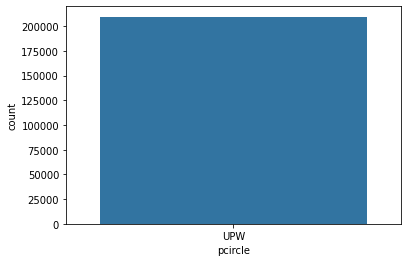

In [34]:
sns.countplot(mcred.pcircle)
plt.show()

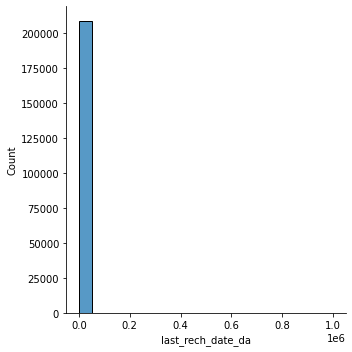

In [35]:
sns.displot(mcred.last_rech_date_da)

In [36]:
y=mcred.iloc[:,0]

In [37]:
x=mcred.iloc[:,1:-4]

In [38]:
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [39]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

In [40]:
#x=x.columns.mean()

In [41]:
for i in x.columns:
    if x[i].skew()>0.5:
        x[i]=np.cbrt(x[i])
    if x[i].skew()>-0.5:
        x[i]=np.cbrt(x[i])
        
x.skew()

aon                     -1.831560
daily_decr30            -0.917894
daily_decr90            -0.858466
rental30                -2.898008
rental90                -2.844925
last_rech_date_ma        0.052928
last_rech_date_da        8.425663
last_rech_amt_ma        -2.308241
cnt_ma_rech30           -0.566341
fr_ma_rech30             0.624014
sumamnt_ma_rech30       -1.787897
medianamnt_ma_rech30    -0.540265
medianmarechprebal30    -1.054665
cnt_ma_rech90           -2.181918
fr_ma_rech90            -0.619659
sumamnt_ma_rech90       -2.025120
medianamnt_ma_rech90    -0.507463
medianmarechprebal90    -2.216165
cnt_da_rech30           10.505368
fr_da_rech30            13.433118
cnt_da_rech90            6.051265
fr_da_rech90            15.732839
cnt_loans30             -4.297568
amnt_loans30            -4.147393
maxamnt_loans30          1.803890
medianamnt_loans30       3.459656
cnt_loans90             -0.152698
amnt_loans90            -3.136986
maxamnt_loans90         -3.698796
medianamnt_loa

In [42]:
def max_r2_score(rgr,x,y):
    max_score=0
    for r in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r)
        rgr.fit(x_train,y_train)
        pred=rgr.predict(x_test)
        r_sc=r2_score(y_test,pred)
        if r_sc>max_score:
            max_score=r_sc
            r_state=r
            
    print('max score at random_state of',r_state,'is',max_score)
    return r_state

## Machine Learning Model

### LinearRegression model

In [44]:
lr=LinearRegression()

In [45]:
sc=max_r2_score(lr,x,y)

max score at random_state of 71 is 0.20504105472335532


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [47]:
print(r2_score(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

0.19715029545163087


RMSE 0.29770918086420795


In [48]:
score=cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[0.19965094 0.19078862 0.19533388 0.19523366 0.20030094]
0.19626160899737366
0.0034547006154714835


In [49]:
lr_score=r2_score(y_test,pred),cross_val_score(lr,x,y,cv=5).mean()

### KNeighborsClassifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=43)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [53]:
print(r2_score(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

0.12385432445568012


RMSE 0.30626777094208263


In [54]:
score=cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[0.11414054 0.10431464 0.09412197 0.1303716  0.11508432]
0.11160661608070555
0.012079119489993306


In [55]:
knn_score=r2_score(y_test,pred),cross_val_score(knn,x,y,cv=5).mean()

In [56]:
knn_score

(0.12385432445568012, 0.9029500147431598)

### AdaBoostClassifier

In [57]:
add=AdaBoostClassifier()

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=43)
add.fit(x_train,y_train)
pred=add.predict(x_test)

In [59]:
print(r2_score(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

0.13276730182642593


RMSE 0.3047059669281821


In [61]:
score=cross_val_score(add,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[0.12877022 0.11392219 0.11486894 0.11683143 0.11901533]
0.11868162236725932
0.005338596692547174


In [63]:
add_score=r2_score(y_test,pred),cross_val_score(add,x,y,cv=5).mean()

In [64]:
add_score

(0.13276730182642593, 0.903722928936397)

### GaussianNB

In [65]:
gb=GaussianNB()

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=43)
gb.fit(x_train,y_train)
pred=gb.predict(x_test)

In [67]:
print(r2_score(y_test,pred))
print('\n')
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

-0.8626829867458776


RMSE 0.450963857713413


In [68]:
score=cross_val_score(gb,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[-0.83853503 -0.86430072 -0.85084771 -0.83294604 -0.83316443]
-0.8439587849638588
0.012070356749081393


In [69]:
gb_score=r2_score(y_test,pred),cross_val_score(gb,x,y,cv=5).mean()

In [70]:
gb_score

(-0.8626829867458776, 0.7985619863434205)

Model Selection

In [82]:
data={'linear':lr_score,'kneighbors':knn_score,'GradientBoostingRegressor':gb_score,'AdaBoost':add_score}

In [83]:
selection=pd.DataFrame(data,index=['r2_score','cross_val_score'])

In [84]:
selection

,linear,kneighbors,GradientBoostingRegressor,AdaBoost
r2_score,0.197150,0.123854,-0.862683,0.132767
cross_val_score,0.196262,0.902950,0.798562,0.903723


model select from joblib library

In [85]:
from sklearn.externals import joblib

In [86]:
joblib.dump(add,'Micro Credit Loan_dataset.obj')

['Micro Credit Loan_dataset.obj']